# BIOMETRIA MIARFID 2021/2022

Ejercicio Curva ROC

José Javier Calvo Moratilla

 Preparación datos y librerias

In [ ]:
# Carpeta de Google Drive
folder_medidas = "drive/MyDrive/MUIARFID/BIOM/medidas/"
!ls "drive/MyDrive/MUIARFID/BIOM/medidas/"

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve

0.2scoresA_clientes  scoresA_impostores  scoresB_clientes	scoresB_impostores


Se leen los scores de los ficheros de entrada

In [ ]:
# Se leen los scores y se almacenan en listas
def leerScore(fichero):
  res = []
  with open(folder_medidas + fichero) as file:
    data = file.readlines()

    for d in data:
      linea = d.replace('\n', '')
      res.append((int(linea[0:4]), float(linea[6:])))
  return res

scoreA_clientes = leerScore("scoresA_clientes")
scoreA_impostores = leerScore("scoresA_impostores")
scoreB_clientes = leerScore("scoresB_clientes")
scoreB_impostores = leerScore("scoresB_impostores")


Función para obtener Vp, FB de un umbral

In [ ]:
# Medidas VP, FP
# VP = clientes que superan el umbral del total
# FP = Impostor que superans el umbral del total

def calcularVPFP(lista, umbral):
  superan_umbral = 0
  len_total = len(lista)

  for persona, score in lista:
    if score > umbral:
      superan_umbral += 1
  
  return superan_umbral / len_total


Se genera la lista de Umbrales y sus respectivos FP y FN

In [ ]:
# Sacar umbrales
def generar_serie_roc(lista_clientes,lista_impostores):
  res_clientes = []
  res_impostores = []

  set_scores = set()

  # recogemos scores de clientes  
  for x in lista_clientes:
    set_scores.add(x[1])

  # recogemos scores de impostores
  for x in lista_impostores:
    set_scores.add(x[1])
  
  # Se recorre cada umbral y se calculan los FP y VP para cada umbral
  for umbral in sorted(set_scores):
    res_clientes.append(calcularVPFP(lista_clientes, umbral))
    res_impostores.append(calcularVPFP(lista_impostores, umbral))
  
  return res_clientes, res_impostores, list(sorted(set_scores))

VPA, FPA, THA = generar_serie_roc(scoreA_clientes, scoreA_impostores)
VPB, FPB, THB = generar_serie_roc(scoreB_clientes, scoreB_impostores)

Curva ROC para scores A, B

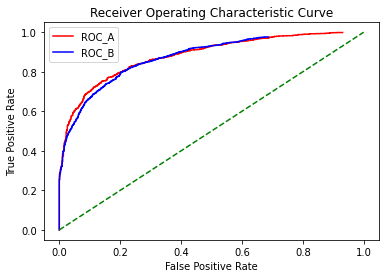

In [ ]:
# Curva ROC
def plot_roc_curve(fperA, tperA, fperB, tperB):
    plt.plot(fperA, tperA, color='red', label='ROC_A')
    plt.plot(fperB, tperB, color='Blue', label='ROC_B')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()

plot_roc_curve(FPA, VPA, FPB, VPB)

In [ ]:
# Optimizamos FP(FN = Y) y umbral
# Scores de impostores, Scores de clientes
# Tengo VP y FP


def optim_FP(lista_VP, lista_FP, lista_TH): 
  Y = float(input()) # FN

  res_FP = []
  res_TH = []

  min_dif_izq = 1.0
  min_dif_der = 1.0
  min_izq = 1.0
  min_der = 1.0    

  for valor_VP in lista_VP:   

    valor_FN = (1 - valor_VP)

    if (Y - valor_FN < min_dif_izq) and ((Y - valor_FN) > 0):
      min_dif_izq = Y - valor_FN
      min_izq = valor_FN

    if (valor_FN - Y < min_dif_der) and ((valor_FN - Y) > 0):
      min_dif_der = valor_FN - Y
      min_der = valor_FN

  minimos = [min_izq, min_der]
  print('Valores más próximos: ', minimos)

    # Recorremos todos los FN
  for index, valor in enumerate(lista_VP): # valores de FN de A -> (1-VP)
          
    if (1 - valor) in minimos: # Si el valor de FN es < X      
      res_FP.append(lista_FP[index])
      res_TH.append(lista_TH[index])

  print('Lista Falsos Positivos ', res_FP)
  print('Lista th: ', res_TH)


print('Optim FN A')
optim_FP(VPA, FPA, THA)
print('Optim FN B')
optim_FP(VPB, FPB, THB)

Optim FN A
0.2
Valores más próximos:  [0.19999999999999996, 0.20069930069930075]
Lista Falsos Positivos  [0.2064102564102564, 0.2064102564102564, 0.20576923076923076, 0.20512820512820512, 0.20448717948717948]
Lista th:  [0.049813, 0.049877, 0.049942, 0.049971, 0.05]
Optim FN B
0.2
Valores más próximos:  [0.19999999999999996, 0.20069930069930075]
Lista Falsos Positivos  [0.2076923076923077, 0.2076923076923077, 0.20705128205128207, 0.2064102564102564, 0.20576923076923076, 0.20512820512820512, 0.20448717948717948]
Lista th:  [0.041949, 0.041991, 0.042208, 0.042396, 0.042584, 0.042614, 0.042627]


In [ ]:
# optimizamos FN(FP = X) y umbral
# Tengo VP y FP
# Necesito FN y FP

def optim_FN(lista_VP, lista_FP, lista_TH):
  X = float(input()) # FP
  
  res_FN = []
  res_TH = []   

  #Tenemos que obtener los puntos más cercanos
  min_dif_izq = 1.0
  min_dif_der = 1.0
  min_izq = 1.0
  min_der = 1.0     

  min_dif_izq = 1.0
  min_dif_der = 1.0
  min_izq = 1.0
  min_der = 1.0    

  for valor_FP in lista_FP:    

    if (X - valor_FP < min_dif_izq) and ((X - valor_FP) > 0):
      min_dif_izq = X - valor_FP
      min_izq = valor_FP

    if (valor_FP - X < min_dif_der) and ((valor_FP - X) > 0):
      min_dif_der = valor_FP - X
      min_der = valor_FP

  minimos = [min_izq, min_der]
  print('Valores más próximos: ', minimos)

  # Recorremos todos los FN
  for index, valor in enumerate(lista_FP): # valores de FN de A -> (1-VP)
          
    if valor in minimos: # Si el valor de FN es < X      
      res_FN.append(1 - lista_VP[index])
      res_TH.append(lista_TH[index])

  print('Lista Falsos Negativos ', res_FN)
  print('Lista th: ', res_TH)

print('Optim FN A')
optim_FN(VPA, FPA, THA)
print('Optim FN B')
#print(VPB)
#print(FPB)
optim_FN(VPB, FPB, THB)

Optim FN A
0.2
Valores más próximos:  [0.19935897435897437, 0.20064102564102565]
Lista Falsos Negativos  [0.2027972027972028, 0.2034965034965035]
Lista th:  [0.050378, 0.050595]
Optim FN B
0.2
Valores más próximos:  [0.19935897435897437, 0.20064102564102565]
Lista Falsos Negativos  [0.2097902097902098, 0.21048951048951048, 0.21118881118881117, 0.21188811188811185, 0.21258741258741254, 0.21398601398601402, 0.2146853146853147]
Lista th:  [0.044444, 0.044465, 0.044473, 0.044643, 0.044761, 0.045517, 0.045561]


In [ ]:
# FP = FN y umbral
def optim_FPFN(lista_VP, lista_FP, lista_TH):

  res = []
  res_TH = []

  for index, valor in enumerate(lista_FP): # valores de VP de A -> FN (1-VP)

    # Aproximacion a un decimal
    valFP = round(lista_FP[index], 2)
    valFN = round(1 - lista_VP[index], 2)

    if valFP == valFN:
      res.append(valFP)
      res_TH.append(lista_TH[index])

  print('Lista Falsos Negativos y Falsos negativos ', res)
  print('Lista th: ', res_TH)

print('Optim FN A')
optim_FPFN(VPA, FPA, THA)
print('Optim FN B')
optim_FPFN(VPB, FPB, THB)


Optim FN A
Lista Falsos Negativos y Falsos negativos  [0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]
Lista th:  [0.05, 0.050058, 0.050114, 0.050144, 0.050248, 0.050255, 0.050307, 0.050331, 0.050333, 0.050378, 0.050401, 0.050524, 0.050595, 0.050633, 0.050678, 0.050926, 0.050932, 0.050933]
Optim FN B
Lista Falsos Negativos y Falsos negativos  [0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]
Lista th:  [0.042627, 0.04277, 0.042802, 0.04315, 0.04343, 0.043529, 0.043767, 0.043833, 0.043884, 0.043896, 0.043931]


Experimento para ejemplo diapositivas

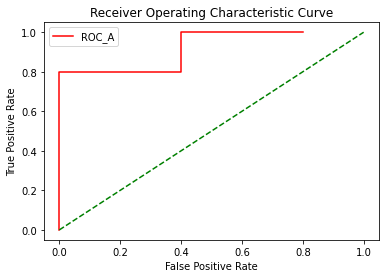

Lista Falsos Negativos y Falsos negativos  []
Lista th:  []


In [ ]:
def calcularVPFP_ejemplo(lista, umbral):
  superan_umbral = 0
  len_total = len(lista)

  for score in lista:
    if score > umbral:
      superan_umbral += 1
  
  return superan_umbral / len_total


# Sacar umbrales
def generar_serie_roc_prueba(lista_clientes,lista_impostores):
  res_clientes = []
  res_impostores = []

  set_scores = set()

  # recogemos scores de clientes  
  for x in lista_clientes:
    set_scores.add(x)

  # recogemos scores de impostores
  for x in lista_impostores:
    set_scores.add(x)
  
  # Se recorre cada umbral y se calculan los FP y VP para cada umbral
  for umbral in sorted(set_scores):
    res_clientes.append(calcularVPFP_ejemplo(lista_clientes, umbral))
    res_impostores.append(calcularVPFP_ejemplo(lista_impostores, umbral))
  
  return res_clientes, res_impostores, list(sorted(set_scores))


clientes = [0.9, 0.7,0.7,0.8,0.4]
impostores = [0.2, 0.1,0.5,0.5,0.3]
th = [0.0,0.1,0.2,0.3,0.4,0.5,0.5,0.7,0.7,0.8,0.8,1.0]

VP, FP, TH = generar_serie_roc_prueba(clientes, impostores)

plt.plot(FP, VP, color='red', label='ROC_A')
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend()
plt.show()

#optim_FN(VP, FP, TH)
#optim_FP(VP, FP, TH)
optim_FPFN(VP, FP, TH)


Experimento para scores Ejemplo Diapositivas, A, B 

In [ ]:
# Area bajo la curva ROC Vieja

def punto_max_x(lista_x, lista_y, val_x):
  res = 0.0
  for idx, val in enumerate(lista_x):
    if round(val, 2) == round(val_x, 2):
      if lista_y[idx] > res:
        res = lista_y[idx]
  return res


# Recorremos todos los X
# Por cada X obtienes la lista de valores en VP y te quedas con el mayor
# Obtienes el menor
def AUC(lista_FP, lista_VP):
  assert len(lista_FP) == len(lista_VP)
  area = 0

  #Se recorre las X para sacar los trapecios
  for idx, val_x in enumerate(lista_FP):
    if idx < len(lista_FP) - 1:
          
      #Obtenemos el valor máximo de Y para un X concreto
              
      #y
      VP1 = punto_max_x(lista_FP, lista_VP, lista_FP[idx])      

      # X
      FP1 = lista_FP[idx]#X (t1)
      FP2 = lista_FP[idx+1]#X (t2)

      # area = 1/2*(C1+C2)*(t2-t1)"
      area += VP1*(FP2-FP1)
  return round(area, 4)   

print(AUC(sorted(FP + [0.0, 1.0]), sorted(VP + [0.0, 1.0])))
print(AUC(sorted(FPA + [0.0, 1.0]), sorted(VPA + [0.0, 1.0])))  
print(AUC(sorted(FPB+ [0.0, 1.0]), sorted(VPB+ [0.0, 1.0])))

0.92
0.8851
0.8755


In [ ]:
def heuristica(c, i):

  res = 0.0

  if c > i:
    res = 1.0
  elif c < i:
    res = 0.0
  else:
    res = 0.5

  return res   

# Area curva ROC nueva
def MWU_ROC_ejemplo(scores_cli, scores_imp):
  
  sumatorios = 0.0

  # AUC= 1/(C * I) * Sum sum h(Sc, Si)
  C = len(scores_cli)
  I = len(scores_imp)

  for c in scores_cli:
    for i in scores_imp:
      
      sumatorios += heuristica(c, i)
  
  return (1 / (C * I)) * sumatorios

# Area curva ROC nueva
def MWU_ROC(scores_cli, scores_imp):
  
  sumatorios = 0.0

  # AUC= 1/(C * I) * Sum sum h(Sc, Si)
  C = len(scores_cli)
  I = len(scores_imp)

  for c in scores_cli:
    for i in scores_imp:
      
      sumatorios += heuristica(c[1], i[1])
  
  return (1 / (C * I)) * sumatorios

scoreE_clientes = [0.9, 0.7,0.7,0.8,0.4]
scoreE_impostores = [0.2, 0.1,0.5,0.5,0.3]

print(MWU_ROC_ejemplo(scoreE_clientes, scoreE_impostores))
print(MWU_ROC(scoreA_clientes, scoreA_impostores))
print(MWU_ROC(scoreB_clientes, scoreB_impostores))
  

0.92
0.8818132508517124
0.8760034516765286


In [ ]:
# D-Prime
def dprime_ejemplo(Vpos, Fpos):
  media_pos = np.mean(Vpos)
  media_neg = np.mean(Fpos)
  var_pos = np.std(Vpos)**2
  var_neg = np.std(Fpos)**2

  d_prime = (media_pos - media_neg) / np.sqrt(var_pos + var_neg)
  return d_prime

def dprime(sc, si):

  scores_cli = []
  scores_imp = []

  for x in sc:
    scores_cli.append(x[1])
  
  for x in si:
    scores_imp.append(x[1])

  media_pos = np.mean(scores_cli)
  media_neg = np.mean(scores_imp)
  var_pos = np.std(scores_cli)**2
  var_neg = np.std(scores_imp)**2

  d_prime = (media_pos - media_neg) / np.sqrt(var_pos + var_neg)
  return d_prime

print(dprime_ejemplo(scoreE_clientes , scoreE_impostores))
print(dprime(scoreA_clientes , scoreA_impostores))
print(dprime(scoreB_clientes , scoreB_impostores))


1.6413500086045838
0.7590270914083886
0.8608883460111528
